<center>
<h1><b>Lab 4</b></h1>
<h1>PHYS 580 - Computational Physics</h1>
<h2>Professor Molnar</h2>
</br>
<h3><b>Ethan Knox</b></h3>
<h4>https://www.github.com/ethank5149</h4>
<h4>ethank5149@gmail.com</h4>
</br>
</br>
<h3><b>September 24, 2020</b></h3>
</center>

$$I\ddot{\theta}-c\dot{\theta}-mgl\sin{\theta}+F_D\cos{\omega_Dt}$$
$$\ddot{\theta}-\frac{c}{I}\dot{\theta}-\frac{mgl}{I}\sin{\theta}+\frac{F_D}{I}\cos{\omega_Dt}$$
$$\omega_0=\sqrt{\frac{mgl}{I}},\zeta=\frac{c}{2I\omega_0},A=\frac{F_D}{I}$$
$$\ddot{\theta}-2\zeta\omega_0\dot{\theta}-\omega_0^2\sin{\theta}+A\cos{\omega_Dt}$$

### Imports

In [16]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from functools import partial

### Support Functions

In [35]:
def df_nonlinear_pendulum(t, x, dx, zeta, w0, A, wd):
    return -2 * zeta * w0 * dx - w0 ** 2 * np.sin(x) + A * np.cos(wd * t)


## Custom dsolve function using Euler-Cromer that constrains domain to (-pi, pi)
def dsolve(f, t, y0, dy0):
    t = np.asarray(t)  # Ensure t is a Numpy array
    y0 = np.asarray(y0)

    y = np.zeros((np.size(t), np.size(y0)))  # Create our output data container
    dy = np.zeros((np.size(t), np.size(dy0)))  # Create our output data container
    y[0] = y0  # Set initial condition
    dy[0] = dy0  # Set initial condition

    for i in range(np.size(t)-1):    
        dy[i+1] = dy[i] + f(t[i], y[i], dy[i]) * (t[i + 1] - t[i])
        check_domain = y[i] + dy[i + 1] * (t[i + 1] - t[i])
        y[i+1] = check_domain if -np.pi <= check_domain <= np.pi else (check_domain + 2*np.pi if check_domain < 0 else check_domain - 2*np.pi) 
    return y, dy

In [48]:
# physical parameters and initial conditions (units are in [] brackets)
g    = 9.81  # gravitational acceleration [m/s^2] (hardcoded)
m = 1
l   = 10  # length of pendulum [m]
I = m*l**2

zeta = 1  # dissipation coefficient [1/s]
A  = 1.2  # driving coefficient [1/s^2]
wd = np.pi  # driving angular frequency [rad/s]
w0 = np.sqrt(m*g*l/I)
tau0 = 1/wd

# t==2*np.pi*n/wd


theta0  = np.asarray([np.pi,])  # initial angle wrt to vertical [rad]
dtheta0  = np.asarray([0,])  # initial angular velocity [rad/s]



df = partial(df_nonlinear_pendulum, zeta=zeta, w0=omega0, A=A, wd=wd)
N = 1000
# computational parameters: dt[s], nsteps
dt = 0.001  # dt [s]
nsteps = 1000  # number of time steps to calculate
t = np.linspace(0, N * tau0, nsteps)
# ts = np.arange(0, 100, )
# compute evolution
theta, omega = dsolve(df, t, theta0, dtheta0)

# calculate 'energy' at each timestep 
energy  = m * g * l * (1.0 - np.cos(theta)) + 0.5 * I * omega ** 2




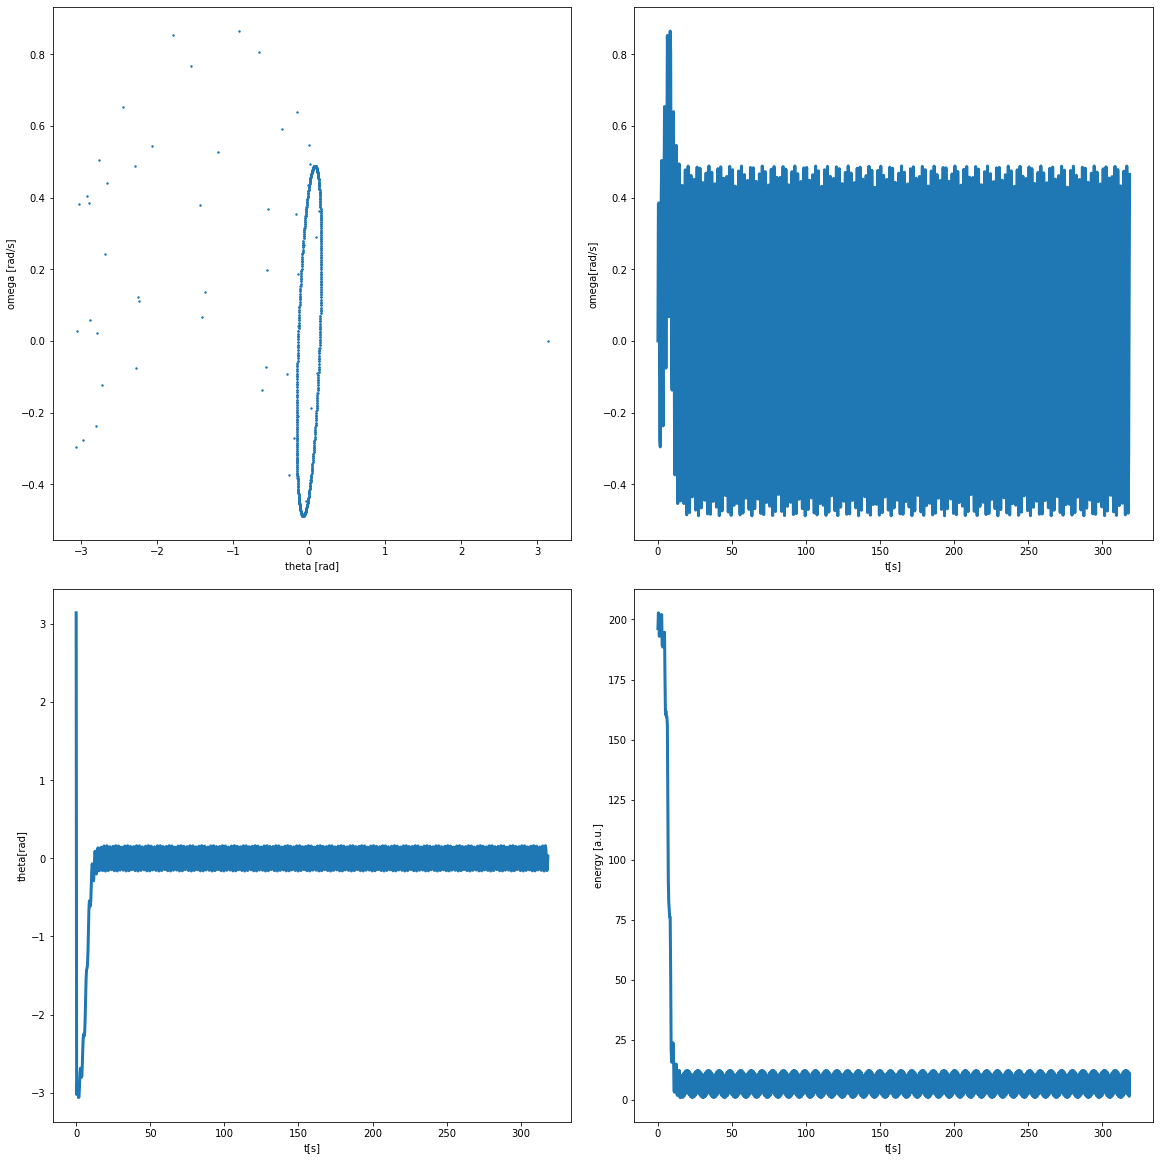

In [49]:
# plots

#fontsize = 30   # fontsize, need to be tuned to screen resolution
fontsize = 15    # fontsize, for 1920x1080
linewidth = 3
pointarea = 2.

# make a 2x2 array of plots 
fig, axArray = plt.subplots(2, 2, figsize=(16,16), constrained_layout=True)

((ax0, ax1), (ax2, ax3)) = axArray

# theta-omega  (TOP LEFT)
ax0.scatter(theta[:N:], omega[:N:], s = pointarea, label = "phase space")

# ax0.tick_params(labelsize = fontsize)
# ax0.legend(fontsize = fontsize)
ax0.set_xlabel("theta [rad]")
ax0.set_ylabel("omega [rad/s]")

# titleString  = "dt=" + str(dt) + ", L=" + str(L) 
# titleString += ", fD=" + str(fD) + ", OmegaD=" + str(round(OmegaD, 3))
# titleString += ", omega0=" + str(om0) + ", theta0=" + str(th0)
# ax0.set_title(titleString, fontsize = fontsize)

# omega (TOP RIGHT)
ax1.plot(t[:N:], omega[:N:], linewidth = linewidth, label = "omega")

# ax1.tick_params(labelsize = fontsize)
# ax1.legend(fontsize = fontsize)
ax1.set_xlabel("t[s]")
ax1.set_ylabel("omega[rad/s]")

# theta (BOTTOM LEFT)
ax2.plot(t[:N:], theta[:N:], linewidth = linewidth, label = "theta")

# ax2.tick_params(labelsize = fontsize)
# ax2.legend(fontsize = fontsize)
ax2.set_xlabel("t[s]")
ax2.set_ylabel("theta[rad]")


# energy (BOTTOM RIGHT)
ax3.plot(t[:N:], energy[:N:], linewidth = linewidth, label = "energy")

# ax3.tick_params(labelsize = fontsize)
# ax3.legend(fontsize = fontsize)
ax3.set_xlabel("t[s]")
ax3.set_ylabel("energy [a.u.]")

plt.show()